# Simulate MA(1) Time Series

You will simulate and plot a few MA(1) time series, each with a different parameter, 
, using the arima_process module in statsmodels, just as you did in the last chapter for AR(1) models. You will look at an MA(1) model with a large positive 
 and a large negative 
.

As in the last chapter, when inputting the coefficients, you must include the zero-lag coefficient of 1, but unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect. For example, for an MA(1) process with 
, the array representing the MA parameters would be ma = np.array([1, -0.9])

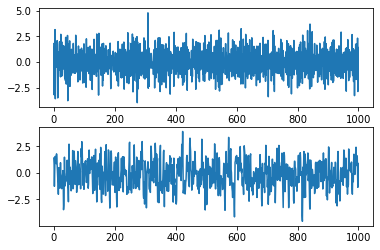

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

# Compute the ACF for Several MA Time Series

Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not 
, but rather 
. For example, if the MA parameter, 
, is = +0.9, the first-lag autocorrelation will be 
, and the autocorrelation at all other lags will be zero. If the MA parameter, 
, is -0.9, the first-lag autocorrelation will be 
.

You will verify these autocorrelation functions for the three time series you generated in the last exercise.

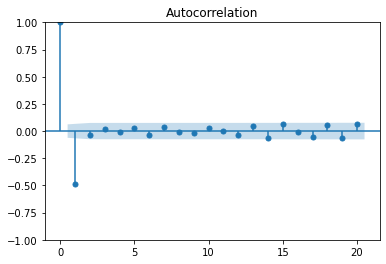

In [2]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

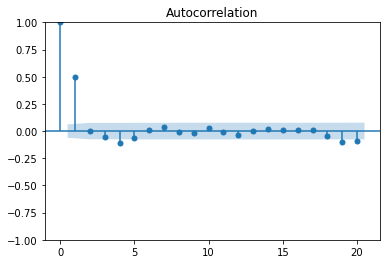

In [3]:
# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.show()

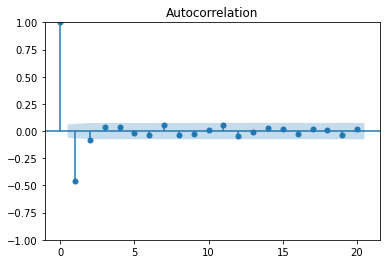

In [4]:
ar3 = np.array([1])
ma3 = np.array([1, -0.9])
MA_object3 = ArmaProcess(ar3, ma3)

simulated_data_3 = MA_object3.generate_sample(nsample=1000)
# Plot 3: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plt.show()

# Match ACF with MA Model

Which figure corresponds to an MA(1) model with an MA parameter of -0.5

<center><img src="images/04.05.png"  style="width: 400px, height: 300px;"/></center>


- D

# Estimating an MA Model

You will estimate the MA(1) parameter, 
, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true 
 of -0.9, you will print out the estimate of 
. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

In [5]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an MA(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(0,0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1386.272
Date:                Sat, 27 Jan 2024   AIC                           2778.545
Time:                        12:19:01   BIC                           2793.268
Sample:                             0   HQIC                          2784.140
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.003     -0.236      0.813      -0.007       0.006
ma.L1         -0.8936      0.014    -63.670      0.000      -0.921      -0.866
sigma2         0.9352      0.044     21.112      0.0

In [6]:

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta is:")
print(res.params[1])

When the true theta=-0.9, the estimate of theta is:
-0.8936254188424844


# Forecasting with MA Model

As you did with AR models, you will use MA models to forecast in-sample and out-of-sample data using the plot_predict() function in statsmodels.

For the simulated series simulated_data_1 with 
, you will plot in-sample and out-of-sample forecasts. One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are simply the mean of the sample.

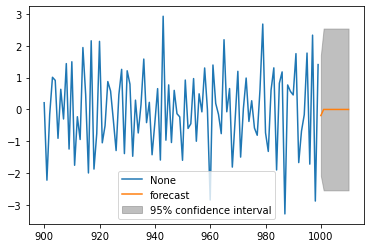

In [11]:
import pandas as pd
# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast the first MA(1) model
mod = ARIMA(simulated_data_1, order=(0,0,1))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1 = pd.Series(simulated_data_1)
simulated_data_1[900:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

# High Frequency Stock Prices

Higher frequency stock data is well modeled by an MA(1) process, so it's a nice application of the models in this chapter.

The DataFrame intraday contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

Before you can analyze the time series data, you will have to clean it up a little, which you will do in this and the next two exercises. When you look at the first few rows (see the IPython Shell), you'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of intraday data.

If you look at the data types, you'll notice that the DATE column is an object, which here means a string. You will need to change that to numeric before you can clean up some missing data.

The source of the minute data is Google Finance (see here on how the data was downloaded).

In [25]:
intraday = pd.read_csv("dataset/Sprint_Intraday.csv", header=None).drop([2,3,4,5], axis=1)
intraday.head()

,0,1
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [26]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE' , 'CLOSE']

# Examine the data types for each column
print(intraday.dtypes)



DATE      object
CLOSE    float64
dtype: object


In [27]:
# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')
# Examine the data types for each column
print(intraday.dtypes)
print(intraday.head())

CLOSE    float64
dtype: object
       CLOSE
DATE        
0     8.2900
1     8.2700
2     8.2800
3     8.2750
4     8.2875


# More Data Cleaning: Missing Data

When you print out the length of the DataFrame intraday, you will notice that a few rows are missing. There will be missing data if there are no trades in a particular one-minute interval. One way to see which rows are missing is to take the difference of two sets: the full set of every minute and the set of the DataFrame index which contains missing rows. After filling in the missing rows, you can convert the index to time of day and then plot the data.

Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between the one-cent increments) rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range. This is sometimes referred to as "bid/ask bounce".

In [28]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389


In [29]:
# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything.difference(set_intraday)

# Print the difference
print("Missing rows: ", set_missing)

Missing rows:  {182, 14}


In [30]:
# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

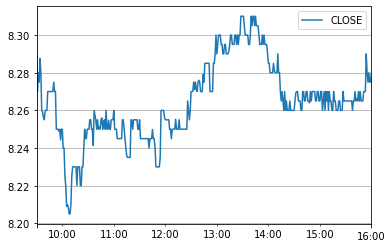

In [31]:
# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

# Applying an MA Model

The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) model to the intraday stock data from the last exercise.

The first step is to compute minute-by-minute returns from the prices in intraday, and plot the autocorrelation function. You should observe that the ACF looks like that for an MA(1) process. Then, fit the data to an MA(1), the same way you did for simulated data.

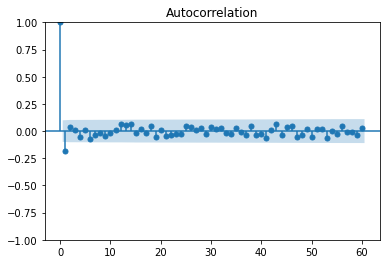

In [32]:
# Import plot_acf and ARIMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags = 60)
plt.show()


In [33]:

# Fit the data to an MA(1) model
mod = ARIMA(returns, order=(0,0,1))
res = mod.fit()
print(res.params[1])

-0.1717161939480059


# Equivalence of AR(1) and MA(infinity)

To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA(
) model with the appropriate parameters.

You will simulate an MA model with parameters 
 for a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with 
.

Note, to raise a number x to the power of an exponent n, use the format x**n.

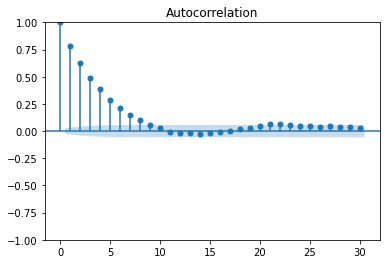

In [34]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [(0.8)**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()